In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import yfinance as yf
%matplotlib widget

In [2]:
start = dt.datetime(2022, 5, 21)

simbols = "AAPL COF GDDY ABT QRTEA OPK ACRE AIV WTI JBLU"
tickers = yf.Tickers(simbols)
stock_data = tickers.history(start=start, actions=False, rounding=True)

[*********************100%***********************]  10 of 10 completed


### Open positions:

In [3]:
AAPL_COF = pd.DataFrame(stock_data["Close"]["AAPL"]/stock_data["Close"]["COF"])
AAPL_COF.columns= ["AAPL / COF"]
####
GDDY_ABT = pd.DataFrame(stock_data["Close"]["GDDY"]/stock_data["Close"]["ABT"])
GDDY_ABT.columns= ["GDDY / ABT"]
GDDY_ABT = GDDY_ABT.loc["2022-7-1":]
####
QRTEA_OPK = pd.DataFrame(stock_data["Close"]["QRTEA"]/stock_data["Close"]["OPK"])
QRTEA_OPK.columns= ["QRTEA / OPK"]
QRTEA_OPK = QRTEA_OPK.loc["2022-10-25":]
####
ACRE_AIV = pd.DataFrame(stock_data["Close"]["ACRE"]/stock_data["Close"]["AIV"])
ACRE_AIV.columns= ["ACRE / AIV"]
ACRE_AIV = ACRE_AIV.loc["2022-10-26":]
####
WTI_JBLU = pd.DataFrame(stock_data["Close"]["WTI"]/stock_data["Close"]["JBLU"])
WTI_JBLU.columns= ["WTI / JBLU"]
WTI_JBLU = WTI_JBLU.loc["2022-10-27":]


Trades = pd.concat([AAPL_COF, GDDY_ABT, QRTEA_OPK, ACRE_AIV, WTI_JBLU], axis=1)
pct_change_data = ((Trades.pct_change())+1).cumprod()
pct_change_data.tail()

,AAPL / COF,GDDY / ABT,QRTEA / OPK,ACRE / AIV,WTI / JBLU
Date,,,,,
2022-10-21 00:00:00-04:00,1.264769,1.244448,NaN,NaN,NaN
2022-10-24 00:00:00-04:00,1.266257,1.210139,NaN,NaN,NaN
2022-10-25 00:00:00-04:00,1.239662,1.253202,NaN,NaN,NaN
2022-10-26 00:00:00-04:00,1.211277,1.240484,0.944135,NaN,NaN
2022-10-27 00:00:00-04:00,1.211277,1.257464,1.007184,1.012937,NaN


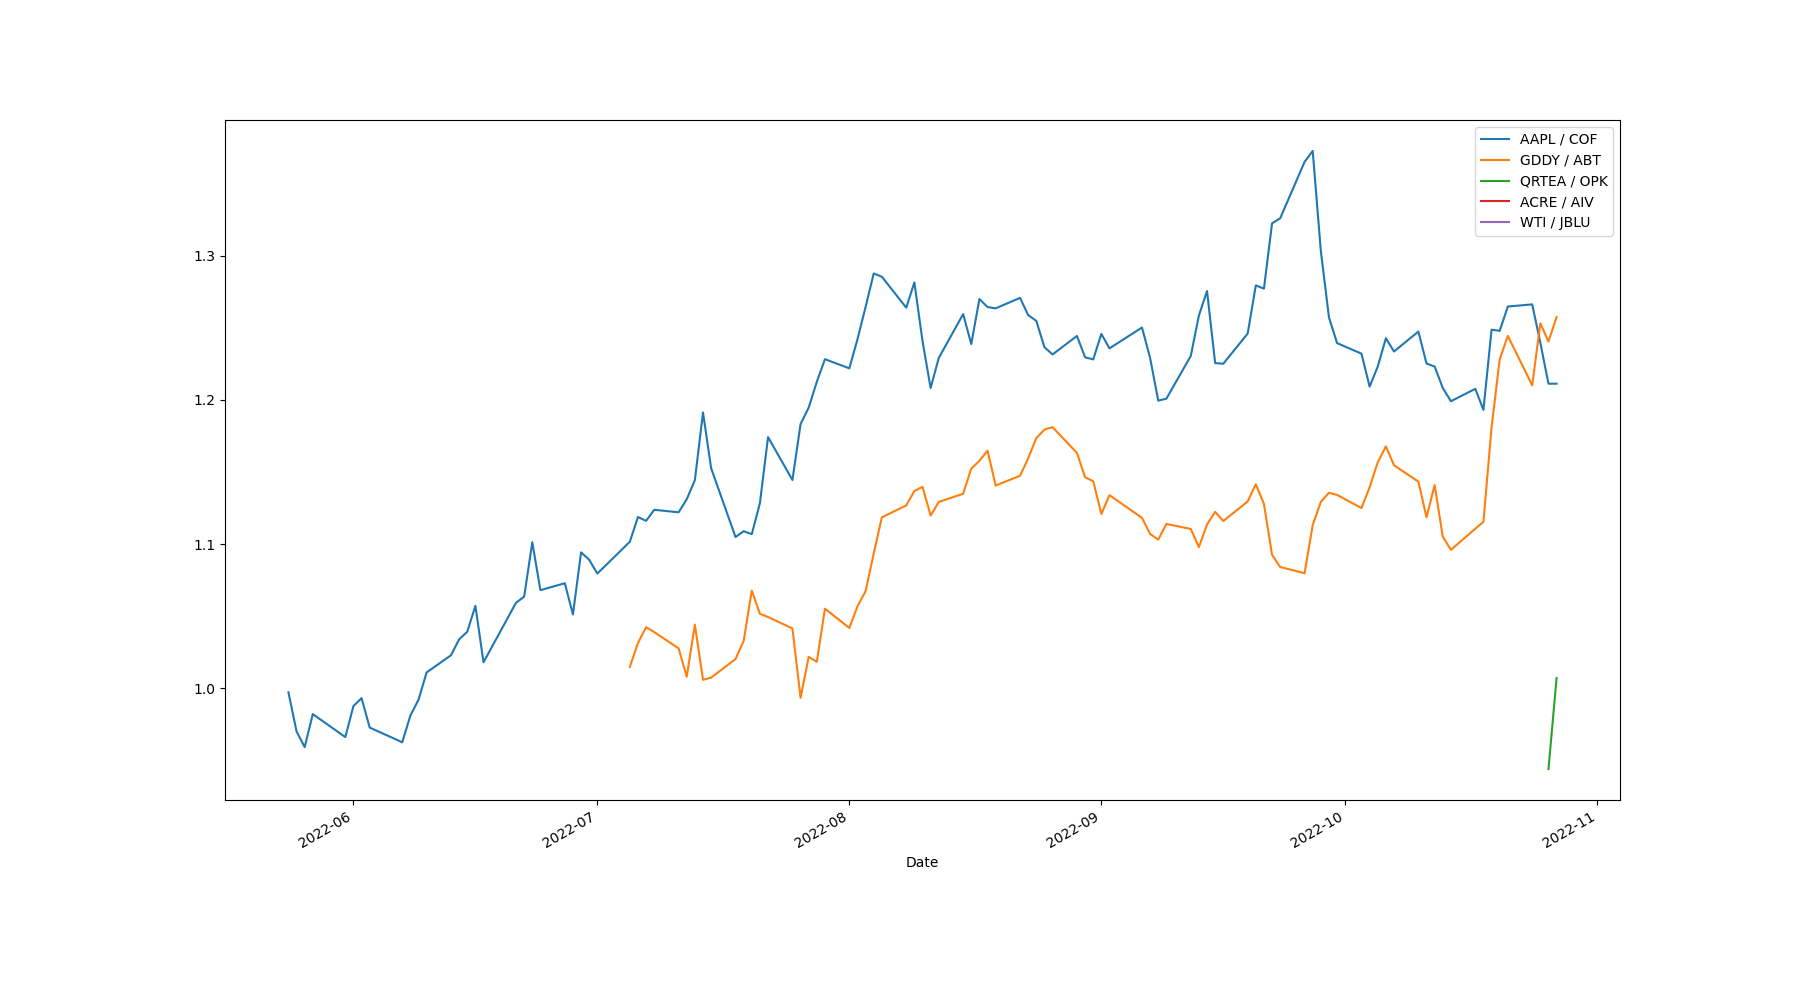

In [4]:
fig, ax = plt.subplots(figsize=(18,10))
pct_change_data.plot(ax=ax);